# Telecom X: Telecom X - Análisis de Evasión de Clientes

Entender las causas de la evasión de clientes en la empresa Telecom X mediante un proceso de ETL y análisis exploratorio de datos (EDA), para apoyar al equipo de ciencia de datos en la construcción de modelos predictivos y estrategias de retención.

## 1. Importación de librerías

In [2]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

print("Librerías importadas correctamente. Entorno listo para trabajar.")

Librerías importadas correctamente. Entorno listo para trabajar.


## 2. Carga de datos y conversion a DataFrame

In [3]:
# Cargar los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

In [4]:
# Convertir a DataFrame
df = pd.DataFrame(data)
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [5]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 🔧Transformación

In [6]:
# Expandir columnas anidadas
nestedData_col = ['customer', 'phone', 'internet', 'account']

for col in nestedData_col:
    nestedData = pd.json_normalize(df[col])
    nestedData.columns = [f"{col}_{subcol}".lower() for subcol in nestedData.columns]
    df = pd.concat([df.drop(columns=[col]), nestedData], axis=1)

# Normalizar nombres de columnas
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Relaizar un backup y guardar CSV

In [8]:
# Ruta del archivo
ruta_backup = '../data/backup/telecomx_datos.csv'

# Crear la carpeta si no existe
if not os.path.exists('../data/backup/'):
    os.makedirs('../data/backup/')
    print("Carpeta '../data/backup/' creada.")
else:
    print("Carpeta '../data/backup/' ya existe.")

# Crear el backup en memoria
df_backup = df.copy()
print("Backup en memoria creado.")

# Guardar el backup como CSV
df_backup.to_csv(ruta_backup, index=False)
print(f"Backup guardado correctamente en '{ruta_backup}'.")


Carpeta '../data/backup/' ya existe.
Backup en memoria creado.
Backup guardado correctamente en '../data/backup/telecomx_datos.csv'.


### Inconsistencias

In [9]:
# Cargar CSV (normalizado)
df_data = pd.read_csv('../data/backup/telecomx_datos.csv')

#### Limpieza de datos

In [10]:
# Conocer el total de Filas y Columnas
filas = df_data.shape[0]
columnas = df_data.shape[1]

print(f"Total de filas: {filas}, \nTotal de columnas: {columnas}")

Total de filas: 7267, 
Total de columnas: 21


In [11]:
# Visualizar nombre de columnas
df_data.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges.monthly', 'account_charges.total'],
      dtype='object')

In [12]:
df_limpiar_datos = df_data.copy()

In [13]:
# Cambiar valores columna 'churn'
if 'churn' in df_limpiar_datos.columns:
    df_limpiar_datos['churn'] = df_limpiar_datos['churn'].map({'Yes': 'Canceló', 'No': 'Retenido'})
    print("Cambios realizados.")
else:
    print("Atención: Columna 'churn' no encontrada.")

Cambios realizados.


In [14]:
# Cambiar valores columna 'customer_seniorcitizen'
if 'customer_seniorcitizen' in df_limpiar_datos.columns:
    df_limpiar_datos['customer_seniorcitizen'] = df_limpiar_datos['customer_seniorcitizen'].map({0: 'No', 1: 'Sí'})
    print("Cambios realizados.")
else:
    print("Atención: Columna 'customer_seniorcitizen' no encontrada.")

Cambios realizados.


In [15]:
# Cambiar valores columnas booleanas
booleanas = [
    'account_paperlessbilling', 'customer_dependents', 'customer_partner',
    'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
    'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
    'phone_phoneservice', 'phone_multiplelines'
]

procesadas = []
no_encontradas = []

for col in booleanas:
    if col in df_limpiar_datos.columns:
        df_limpiar_datos[col] = df_limpiar_datos[col].replace({'Yes': 'Sí', 'No': 'No'})
        procesadas.append(col)
    else:
        no_encontradas.append(col)

print(f"Columnas procesadas: {procesadas}")
if no_encontradas:
    print(f"Columnas no encontradas: {no_encontradas}")

Columnas procesadas: ['account_paperlessbilling', 'customer_dependents', 'customer_partner', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'phone_phoneservice', 'phone_multiplelines']


In [16]:
# Revisar los cambios
df_limpiar_datos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,Retenido,Female,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.3
1,0003-MKNFE,Retenido,Male,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Canceló,Male,No,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,0011-IGKFF,Canceló,Male,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85
4,0013-EXCHZ,Canceló,Female,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.4


### Valores nulos

In [17]:
hay_nulos = False

print("Columnas con valores nulos y su cantidad:")

for columna in df_limpiar_datos.columns:
    nulos = df_limpiar_datos[columna].isna().sum()
    if nulos > 0:
        print(f"{columna}: {nulos}")
        hay_nulos = True

if not hay_nulos:
    print("No se encontraron valores nulos en ninguna columna.")

Columnas con valores nulos y su cantidad:
churn: 224


In [18]:
df_eliminar_nulos = df_limpiar_datos.copy()

In [19]:
# Eliminar valores nulos (filas)
df_eliminar_nulos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,Retenido,Female,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.3
1,0003-MKNFE,Retenido,Male,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Canceló,Male,No,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,0011-IGKFF,Canceló,Male,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85
4,0013-EXCHZ,Canceló,Female,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.4


In [20]:
df_eliminar_nulos = df_eliminar_nulos.query(' & '.join([f'`{col}` == `{col}`' for col in df.columns]))


In [21]:
hay_nulos = False

print("Columnas con valores nulos y su cantidad:")

for columna in df_eliminar_nulos.columns:
    nulos = df_eliminar_nulos[columna].isna().sum()
    if nulos > 0:
        print(f"{columna}: {nulos}")
        hay_nulos = True

if not hay_nulos:
    print("No se encontraron valores nulos en ninguna columna.")

Columnas con valores nulos y su cantidad:
No se encontraron valores nulos en ninguna columna.


In [22]:
datos_conservados = round(100 * len(df_eliminar_nulos) / len(df_limpiar_datos), 2)
registros_eliminados = len(df_limpiar_datos) - len(df_eliminar_nulos)

print(f"Registros eliminados: {registros_eliminados}")
print(f"Porcentaje de datos conservados: {datos_conservados}%")


Registros eliminados: 224
Porcentaje de datos conservados: 96.92%


In [23]:
df_eliminar_nulos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,Retenido,Female,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.3
1,0003-MKNFE,Retenido,Male,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Canceló,Male,No,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,0011-IGKFF,Canceló,Male,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85
4,0013-EXCHZ,Canceló,Female,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.4


## Carga y análisis

In [36]:
# Análisis descriptivo
df_eliminar_nulos.describe()

,customer_tenure,account_charges.monthly
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [34]:
# Información del dataframe
df_eliminar_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   object 
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [30]:
# Valores únicos
valores_unicos = df_eliminar_nulos.nunique().reset_index()
valores_unicos.columns = ['Columna', 'Valores Únicos']
valores_unicos = valores_unicos.sort_values(by='Valores Únicos')
print(valores_unicos)


                      Columna  Valores Únicos
1                       churn               2
2             customer_gender               2
3      customer_seniorcitizen               2
4            customer_partner               2
5         customer_dependents               2
7          phone_phoneservice               2
17   account_paperlessbilling               2
10    internet_onlinesecurity               3
16           account_contract               3
15   internet_streamingmovies               3
14       internet_streamingtv               3
13       internet_techsupport               3
9    internet_internetservice               3
11      internet_onlinebackup               3
8         phone_multiplelines               3
12  internet_deviceprotection               3
18      account_paymentmethod               4
6             customer_tenure              73
19    account_charges.monthly            1585
20      account_charges.total            6531
0                  customerid     

In [31]:
# Valores nulos
df_eliminar_nulos.isnull().sum().sort_values(ascending=False)

customerid                   0
internet_onlinebackup        0
account_charges.monthly      0
account_paymentmethod        0
account_paperlessbilling     0
account_contract             0
internet_streamingmovies     0
internet_streamingtv         0
internet_techsupport         0
internet_deviceprotection    0
internet_onlinesecurity      0
churn                        0
internet_internetservice     0
phone_multiplelines          0
phone_phoneservice           0
customer_tenure              0
customer_dependents          0
customer_partner             0
customer_seniorcitizen       0
customer_gender              0
account_charges.total        0
dtype: int64

### Distribución de evasión (churn)

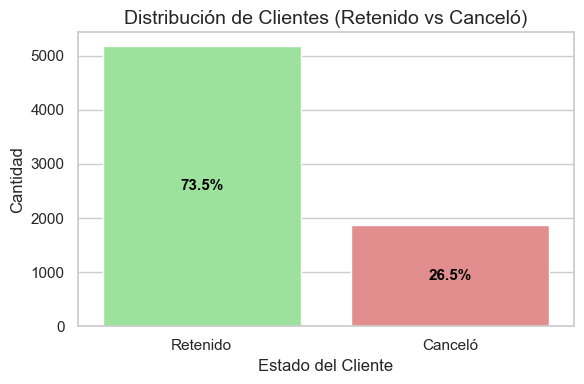

In [48]:
# Orden correcto: primero Retenido, luego Canceló
orden = ['Retenido', 'Canceló']

# Calcular proporciones
proporcion = df_eliminar_nulos['churn'].value_counts(normalize=True) * 100
proporcion = proporcion.round(1)

# Crear gráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x="churn",
    data=df_eliminar_nulos,
    order=orden,
    palette=["#90ee90", "#f08080"]  # verde para Retenido, rojo para Canceló
)

# Títulos y ejes
plt.title("Distribución de Clientes (Retenido vs Canceló)", fontsize=14)
plt.xlabel("Estado del Cliente", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)

# Mostrar porcentaje dentro de cada barra
for p in ax.patches:
    total = len(df_eliminar_nulos)
    porcentaje = (p.get_height() / total) * 100
    ax.annotate(f'{porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', fontsize=11, color='black', weight='bold')

plt.tight_layout()
plt.show()


### Recuento de evasión por variables categóricas

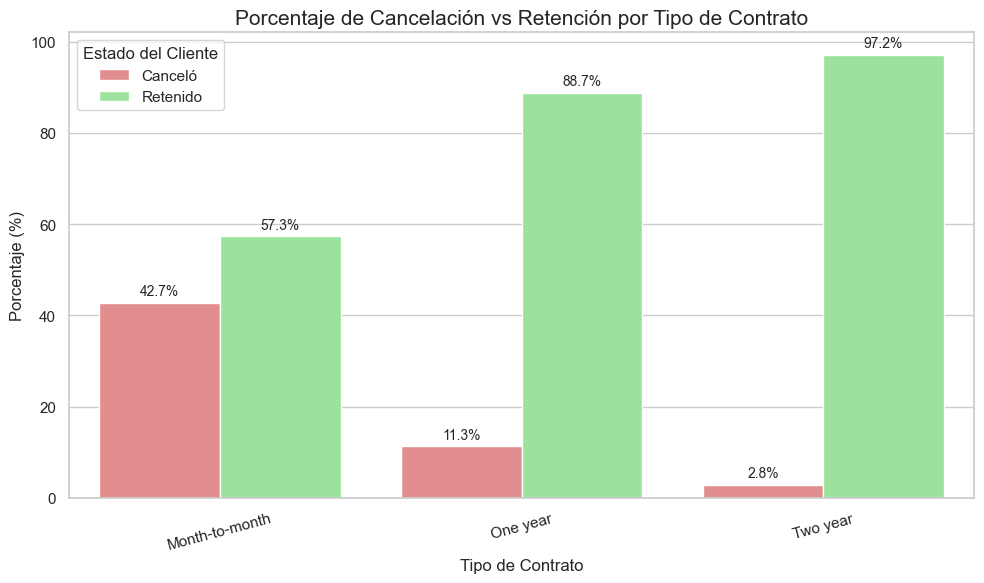

In [54]:
# Copia para no modificar el original
df_plot = df_eliminar_nulos.copy()

# Agrupar por tipo de contrato y churn, luego calcular porcentaje
df_grouped = (
    df_plot.groupby(['account_contract', 'churn'])
    .size()
    .reset_index(name='conteo')
)

# Calcular el total por grupo para obtener porcentaje
df_grouped['total_por_tipo'] = df_grouped.groupby('account_contract')['conteo'].transform('sum')
df_grouped['porcentaje'] = (df_grouped['conteo'] / df_grouped['total_por_tipo']) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_grouped,
    x='account_contract',
    y='porcentaje',
    hue='churn',
    palette={"Retenido": "#90ee90", "Canceló": "#f08080"}
)

# Etiquetas y título
plt.title("Porcentaje de Cancelación vs Retención por Tipo de Contrato", fontsize=15)
plt.xlabel("Tipo de Contrato", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Estado del Cliente")

# Agregar porcentajes encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height + 1),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


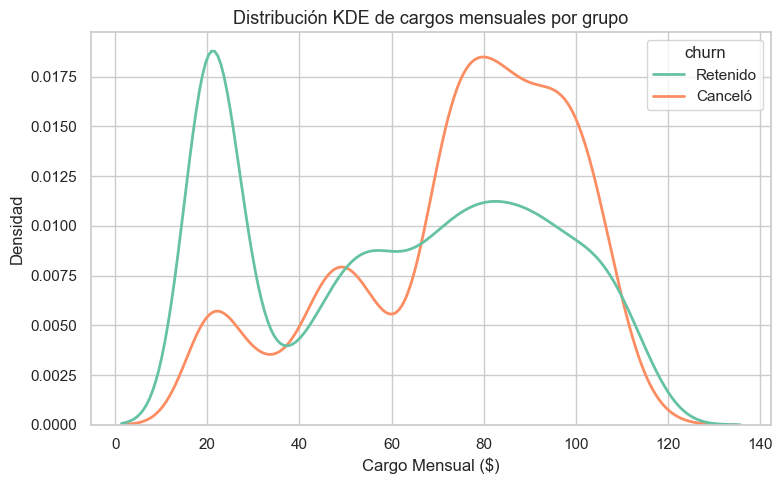

In [65]:
# Estilo general
sns.set(style="whitegrid")

# 2. Gráfico KDE (solo líneas)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_plot,
    x="account_charges.monthly",
    hue="churn",
    fill=False,
    common_norm=False,
    palette="Set2",
    linewidth=2
)
plt.title("Distribución KDE de cargos mensuales por grupo", fontsize=13)
plt.xlabel("Cargo Mensual ($)")
plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

### Conteo de evasión por variables numéricas

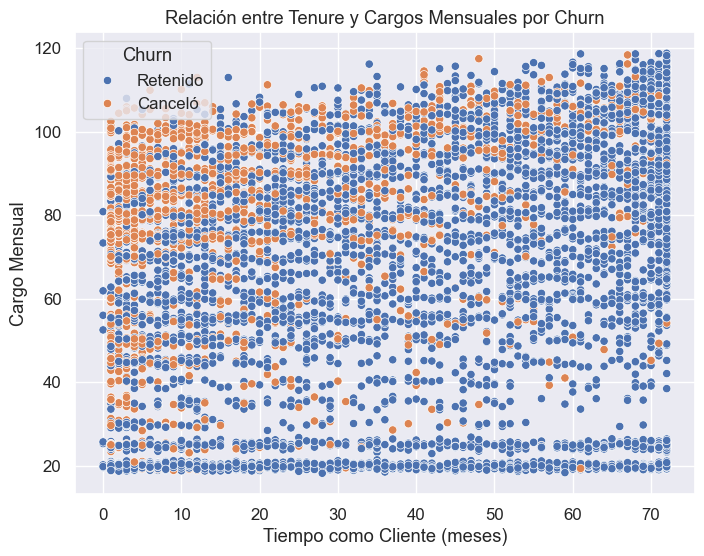

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='customer_tenure', y='account_charges.monthly', hue='churn')
plt.title('Relación entre Tenure y Cargos Mensuales por Churn')
plt.xlabel('Tiempo como Cliente (meses)')
plt.ylabel('Cargo Mensual')
plt.legend(title='Churn')
plt.show()


## ✅ Conclusión

Resumen sobre la Deserción de Clientes en Telecom X
1. Contratos como Factor Clave
- Los usuarios con contratos mensuales tienen una probabilidad mucho mayor de abandonar el servicio en comparación con quienes poseen contratos a uno o dos años.

2. Formas de Pago y su Relación con la Cancelación
- Se observa que quienes pagan mediante tarjetas electrónicas o sistemas automáticos tienden a cancelar con más frecuencia. Esto podría indicar que estos clientes tienen menor sensación de control o compromiso con el servicio.


3. Costos Mensuales y Cancelación
- Los clientes cuyo pago mensual excede los $90 muestran una mayor inclinación a terminar su contrato, lo que podría reflejar una percepción negativa respecto al costo frente a los beneficios.


4. Uso de Facturación Electrónica
- Hay un leve incremento en la tasa de cancelación entre usuarios que optan por la facturación electrónica, probablemente vinculado a problemas de usabilidad o confusión con los cargos.


5. Influencia de Factores Personales
- Aspectos como el estado civil y la existencia de dependientes parecen tener un efecto pequeño, señalando que los clientes con lazos familiares tienden a mantener el servicio por más tiempo.



Sugerencias Estratégicas:
Promover contratos a largo plazo mediante beneficios para fidelizar a los clientes.
Optimizar los canales de pago electrónico para aumentar la confianza y vínculo con los usuarios.
Evaluar y ajustar la política de precios para que sea más atractiva y justa, especialmente para clientes con cargos elevados.
Mejorar la plataforma y comunicación de la facturación electrónica para que sea más intuitiva y transparente.
Desarrollar campañas específicas orientadas a segmentos con familias o dependientes para fortalecer su lealtad.